<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/MachineLearningWithPython/blob/main/colab/final/08 - Project - Convolutional Neural Network (CNN).ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# Project: Create a Convolutional Neural Network
- We will create a model on the [CIFAR-10 dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html)

### Step 1: Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Download the CIFAR10 dataset
- Excute the cell below

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 22s 0us/step


### Step 3: Normalize the pixels
- Divide the **train_images** and **test_images** with 255 to normalize them between 0 and 1.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Step 4: Get the class names of the labels
- Make a class name conversion.
    - HINT: make a list with the name **class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']**
- How to use the name conversion.
    - **class_names[int(train_labels[index])]**
- How to show an image
    - **plt.imshow(train_images[index])**

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'truck'

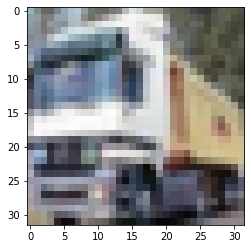

In [5]:
index = 1
plt.imshow(train_images[index])
class_names[int(train_labels[index])]

### Step 5: Create a model
- Create a **Sequential** model
    - **Conv2D** with 32 and (3, 3),  **activation='relu', input_shape=(32, 32, 3)**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **Flatten**
    - **Dense** with 64 nodes with **input_dim=4, activaition='relu'**
    - **Dense** with 10 (the output node)**
- Complie the model with **optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']**

In [6]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, input_dim=4, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

2022-04-23 18:23:35.129534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 18:23:35.188761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 18:23:35.189626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 18:23:35.190305: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1900] Ignoring visible gpu device (device: 0, name: Quadro K1000M, pci bus id: 0000:01:00.0, compute capability: 3.0) with Cuda compute capability 3.0. The minimum required Cuda capability is 3.5.
2022-04-23 18:23:35.191103: I tensorflow/core/platform/cpu_featu

### Step 6: Train the model
- Fit the model with **train_images, train_labels, epochs=10** and **validation_data=(test_images, test_labels)**

In [7]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5327 - accuracy: 0.4400 - val_loss: 1.2506 - val_accuracy: 0.5569
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1630 - accuracy: 0.5896 - val_loss: 1.0881 - val_accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0013 - accuracy: 0.6468 - val_loss: 0.9613 - val_accuracy: 0.6585
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9084 - accuracy: 0.6833 - val_loss: 0.9382 - val_accuracy: 0.6719
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8339 - accuracy: 0.7046 - val_loss: 0.9009 - val_accuracy: 0.6868
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7782 - accuracy: 0.7282 - val_loss: 0.8923 - val_accuracy: 0.6892
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7295 - accuracy: 0.7427 - val_loss: 0.9152 -

### Stpe 7: Test the model
- Make predictions
    - assign the predictions of test_images to a variable
- How to test visually
    - Assign **index=0**
    - Plot the image with **plt.imshow(test_images[index])**
    - See the label from prediction by mapping it from **class_names**

In [8]:
y_pred = model.predict(test_images)

'truck'

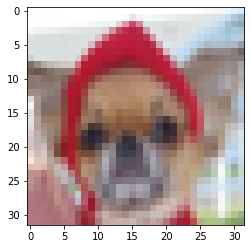

In [9]:
index = 168
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

In [10]:
model.evaluate(test_images, test_labels, verbose=0)

[0.8907056450843811, 0.7092000246047974]

### Step 8 (Optional): Improve the model
- Try to play around with the model to improve the score

In [11]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, input_dim=4, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 106s 67ms/step - loss: 1.5020 - accuracy: 0.4542 - val_loss: 1.2403 - val_accuracy: 0.5567
Epoch 2/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.1398 - accuracy: 0.5964 - val_loss: 1.0376 - val_accuracy: 0.6333
Epoch 3/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.9770 - accuracy: 0.6574 - val_loss: 0.9690 - val_accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 115s 74ms/step - loss: 0.8774 - accuracy: 0.6936 - val_loss: 0.9270 - val_accuracy: 0.6773
Epoch 5/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.7963 - accuracy: 0.7198 - val_loss: 0.8862 - val_accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.7329 - accuracy: 0.7423 - val_loss: 0.8750 - val_accuracy: 0.6984
Epoch 7/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.6814 - accuracy: 0.7614 - val_loss: 0

In [13]:
y_pred = model.predict(test_images)

'frog'

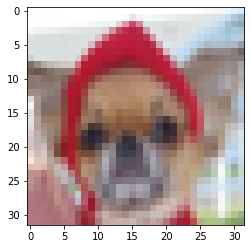

In [14]:
index = 168
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

In [15]:
model.evaluate(test_images, test_labels, verbose=0)

[0.852048933506012, 0.7254999876022339]